#  Investigating Gun Ownership Trends in the United States
Brandon R. Pinkston

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Section 1: Introduction

## Dataset: FBI Gun Data     
This dataset consists of two distinct tables that I will be using in conjunction to answer my questions for today.

### Table 1: US Gun Data
     
Contains the number of firearm permit checks by month of permit date, state of permit, and the type of gun the permit was for.
        
#### *All columns:
     
- month,	state,	permit,	permit_recheck,	handgun,	long_gun,	other,	multiple,	admin,	prepawn_handgun,	prepawn_long_gun,	prepawn_other,	redemption_handgun,	redemption_long_gun,	redemption_other,	returned_handgun,	returned_long_gun,	returned_other,	rentals_handgun,	rentals_long_gun,	private_sale_handgun,	private_sale_long_gun,	private_sale_other,	return_to_seller_handgun,	return_to_seller_long_gun,	return_to_seller_other,	totals	
 
#### *Significant columns  
- month
- state
- permit 
- handgun
- long_gun
- other
- multiple
- totals
        
### Table 2: US Census Data
        
The US census is a constitutionally mandated survey that is held every ten years. The census aims to get an accurate headcount of the total amount of people in the United States. This data can then be broken down into State, city, county, et. for further exploration. 
 
#### *All columns:
     
- Fact,	Fact Note,	Alabama,	Alaska,	Arizona,	Arkansas,	California,	Colorado,	Connecticut,	Delaware,	Florida	,Georgia,	Hawaii,	Idaho,	Illinois,	Indiana,	Iowa,	Kansas,	Kentucky,	Louisiana,	Maine,	Maryland,	Massachusetts,	Michigan,	Minnesota,	Mississippi,	Missouri,	Montana,	Nebraska,	Nevada,	New Hampshire,	New Jersey,	New Mexico,	New York,	North Carolina,	North Dakota,	Ohio,	Oklahoma,	Oregon,	Pennsylvania,	Rhode Island,	South Carolina,	South Dakota,	Tennessee,	Texas,	Utah,	Vermont	Virginia,	Washington,	West Virginia,	Wisconsin,	Wyoming

#### *Significant columns  
- All
        
### Table Relationship

On the surface there is only one real relationship that these two tables share, and it is the fact they both represent data sets at the state level.This means cross ingestion and cross analysis becomes very easy between the two sets of data. With this relationship in mind, we can use the gun data to make insights about states or groups of states based on the amount of gun permits and their classifications and then use the census data taken for those same states and make new insights on the same information based upon this new census data.

### Question(s) for Analysis
1. Is there an overall positive or negative trend of gun permit holdings from 2010 - 2016 for the entire country, and each region?

2. Out of the regions tested in question 1, rank the regions by the median household income, percentage of persons with a bachelors degree or higher, and percentage of persons in poverty.


<a id='wrangling'></a>
# Section 2: Data Wrangling





In [1]:
# importing packages to be used for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data from csv files into pandas dataframe
df_gun = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('US_Census_Data.csv')

In [3]:
#using pandas functions to get some information on our new gun dataframe
df_gun.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [4]:
df_gun.shape

(12485, 27)

### Cleaning the gun data 

**The Significant columns to watch for both datasets is listed in the introduction under each table section

- The gun data seems to be missing quite a bit of information in some columns, but all in all its not in too bad of shape. I will start off by removing all non-important columns from the dataframe to get rid of clutter and make our data easier to read/comprehend. 
- I will be using the same logic on the rows of the dataframe, to only include the years we are looking at from 2010 - 2016. 
- I will transform the month column to a datetime data type and rename it to 'date'
- Lastly I will change the 'permit' column data type to int

In [5]:
# Using iloc to select the indexes of only the columns I want to explore
df_gun_clean = df_gun.drop(df_gun.iloc[:, 8:], axis = 1)

In [6]:
# Visualizing new df to make sure only the intended columns are included
df_gun_clean.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721


In [7]:
# Storing the years we need in a list for clarity and ease of use
words_to_keep = np.asarray(['2010', '2011', '2012', '2013', '2014', '2015', '2016'])

In [8]:
# joining the list and printing to visualize
pattern = '|'.join(words_to_keep)
print(pattern)

2010|2011|2012|2013|2014|2015|2016


In [9]:
# Creating a new dataframe with only the information specified above
df_gun_clean = df_gun_clean.loc[df_gun_clean['month'].str.contains(pattern)]

In [10]:
# Changing data type to datetime for the "month" column and then renaming the column to "date"
df_gun_clean['month'] = df_gun_clean['month'].apply(pd.to_datetime)
df_gun_clean = df_gun_clean.rename(columns = {'month':'date'})

In [11]:
# changin data type of 'permit' column to int
df_gun_clean['permit'] = df_gun_clean['permit'].astype(int)

In [12]:
# printing the shape to see the new dataframes dimensions
print(df_gun_clean.shape)
# and printing the whole clean dataset to confirm accuracy of information 
df_gun_clean.head(5000)

(4620, 8)


,date,state,permit,permit_recheck,handgun,long_gun,other,multiple
495,2016-12-01,Alabama,26996,0.0,13733.0,17519.0,376.0,533
496,2016-12-01,Alaska,254,0.0,4087.0,3698.0,243.0,191
497,2016-12-01,Arizona,8900,121.0,18024.0,13785.0,1180.0,703
498,2016-12-01,Arkansas,3294,692.0,9192.0,13433.0,277.0,385
499,2016-12-01,California,61808,0.0,63649.0,93224.0,77929.0,0
...,...,...,...,...,...,...,...,...
5110,2010-01-01,Virginia,0,NaN,11513.0,10323.0,0.0,309
5111,2010-01-01,Washington,6640,NaN,9348.0,8287.0,471.0,386
5112,2010-01-01,West Virginia,26,NaN,3735.0,4860.0,61.0,342
5113,2010-01-01,Wisconsin,0,NaN,4382.0,7950.0,153.0,7


# Gun cleaning afterthoughts:
- There is an abundance of column data that was cluttering up what I really needed, so I cut these from my dataframe
- I needed to normalize the month column so all values were datetime for clarity and correctness. I also changed the name of the column to date because the data held within is not only a month value. 
- The permits needed to be casted to ints so that they would appear as a whole number rounded down to the nearest whole permit being held.
- All in all this was a relatively simple dataset to wrangle, upon further inspection there could probably be finer tuning done, but for what I need for this project this will do great.

### Cleaning the census data

**The Significant columns to watch for both datasets is listed in the introduction under each table section

1. The census data is laid quite well, and the only changes that I need to make are in the fact note column. This column only had a sparse amount of information included and because of this it has many entries listed as NaN. I will drop the NaN and fill the entries effected with empty strings for uniformity and clarity.  2. I will drop the space from the "Fact Note" column and replace it with an underscore"
- I will drop the row data from row 65 down. The additional data included is metadata describing some things to watch out for when assessing results. This is important to have, but not important to include for now.

In [13]:
#using pandas functions to get some information on our new census dataframe
print(df_census.shape)
df_census.head(50)

(85, 52)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [14]:
# Changing the Fact check column name
df_census_new = df_census.rename(columns = {'Fact Note': 'Fact_Note'})
df_census_new.head()

,Fact,Fact_Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [15]:
# Replacing NaN values in the "Fact Note" column with empty strings. 
df_census_almost_clean = df_census_new.fillna('')

In [16]:
# # Doing this has also removed most values from rows starting at 65 and down
df_census_almost_clean.tail()

,Fact,Fact_Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,,,,,,,,,...,,,,,,,,,,
81,,Not available,,,,,,,,,...,,,,,,,,,,
82,S,Suppressed; does not meet publication standards,,,,,,,,,...,,,,,,,,,,
83,X,Not applicable,,,,,,,,,...,,,,,,,,,,
84,Z,Value greater than zero but less than half uni...,,,,,,,,,...,,,,,,,,,,


In [17]:
# Now I will drop the rows starting at 65 and down
df_census_clean = df_census_almost_clean.drop(df_census_almost_clean.index[65:])

In [18]:
#Removing all instances of the dollar sign for data consistency
df_census_clean[df_census_clean.columns[1:]] = df_census_clean[df_census_clean.columns[1:]].apply(lambda x: x.str.replace('$',''))
#Removing all instances of the comma sign for data consistency
df_census_clean[df_census_clean.columns[2:]] = df_census_clean[df_census_clean.columns[2:]].apply(lambda x: x.str.replace(',',''))

# Showing the new freshly trimmed and cleaned data
df_census_clean

C:\Users\Gaming PC\AppData\Local\Temp\ipykernel_9188\2721288138.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_census_clean[df_census_clean.columns[1:]] = df_census_clean[df_census_clean.columns[1:]].apply(lambda x: x.str.replace('$',''))


,Fact,Fact_Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,"Population, percent change - April 1, 2010 (es...",,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,"Persons under 5 years, percent, July 1, 2016, ...",,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012",,41943,7953,46780,25915,252377,51722,31056,7206,...,8604,59379,213590,18754,8237,76434,49331,12912,39830,6470
61,"Nonveteran-owned firms, 2012",,316984,56091,427582,192988,3176341,469524,281182,60318,...,66219,469392,2057218,219807,63317,548439,461401,94960,370755,51353
62,"Population per square mile, 2010",,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,...,75811,41234.9,261231.71,82169.62,9216.66,39490.09,66455.52,24038.21,54157.80,97093.14


# Census cleaning afterthoughts:

- There was a good amount of sparsely laid out additional metadata for certain rows, and this may be useful in further understanding results, but for the purpose of this study I only want to get preliminary findings.
- It was tricky to clean this data completely as many of the percent values I need for coming analysis was stored in two different formats. (Something that comes later on)
- Later on in this case study, I had to strip the percentage sign away and then apply a lambda function to change the type and values for certain entries in the dataset

# Section 3: Exploratory Data Analysis

### Question 1: Is there an overall positive or negative trend of gun permit purchases from 2010 - 2016 for the entire country, and each region?

In [19]:
#creating dataframe with only the date column
dates_1 = df_gun_clean.iloc[:, :1]
#grouping 'date' column by yearly sum of permits 
dates_1 = df_gun_clean.groupby('date')['permit'].sum()

#finding the max value from the monthly permit totals
dates_1_max =  df_gun_clean.groupby('date')['permit'].sum().max()

In [20]:
# putting the cleaned data into a new dataframe
dates_1 = pd.DataFrame(dates_1)
#checking this new data for accuracy
dates_1
#finding the sum of permits for each year in for a coming bar graph
sum_by_year = df_gun_clean.groupby(df_gun_clean['date'].dt.year)['permit'].sum()

Text(0, 0.5, 'Number of permits in tens of millions')

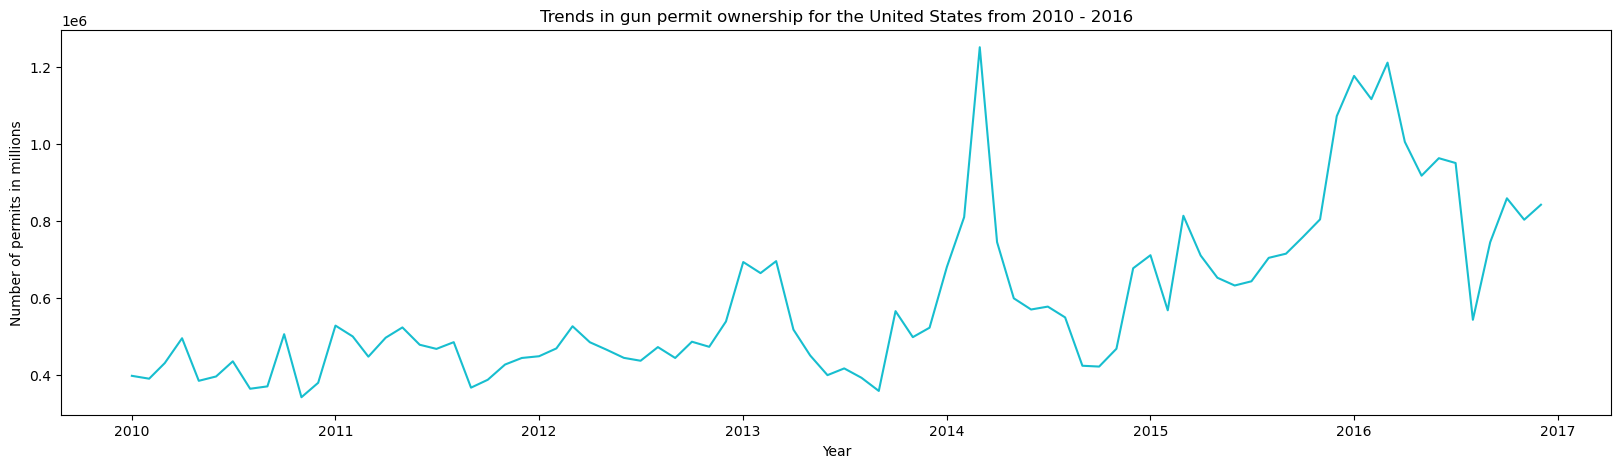

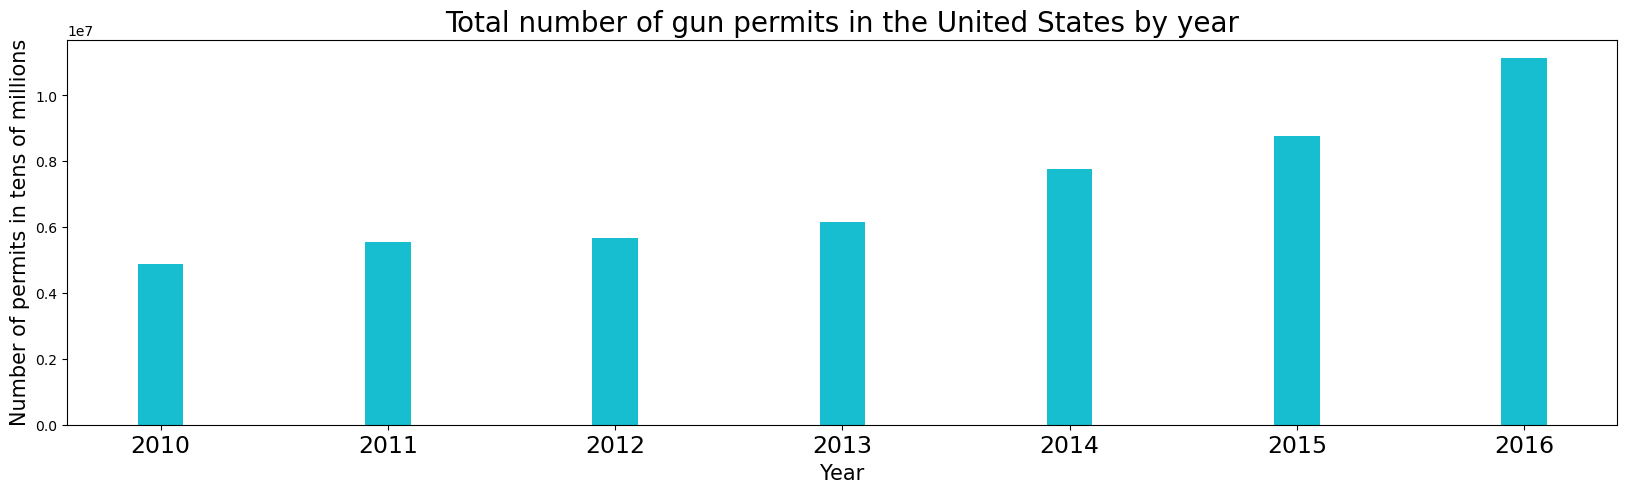

In [42]:
#Plotting gun data for 2010 - 2016 
plt.figure(figsize=(20,5))
plt.plot(dates_1, color = 'tab:cyan')
plt.title('Trends in gun permit ownership for the United States from 2010 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of permits in millions')


tickvalues = range(0,len(words_to_keep))
plt.figure(figsize = (20,5))
plt.xticks(ticks = tickvalues , rotation = 'horizontal', fontsize = 17)
plt.bar(words_to_keep, sum_by_year, width = .2, color = 'tab:cyan')
plt.title('Total number of gun permits in the United States by year', fontsize='20')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of permits in tens of millions', fontsize= 15)


# **Initial thoughts**:

- These first two graphs based on the data from the entire country during the specified dates dhows an impressive amount of positive increase, including massive spikes in permit holdings in both 2014 and 2016.
- What is even more impressive is the year over year growth that can be seen for the total number of gun holdings in each year. This means even though the trends in ownership seem to usually even themselves out, the trends in total permits only continues to increase over time for the dates tested.

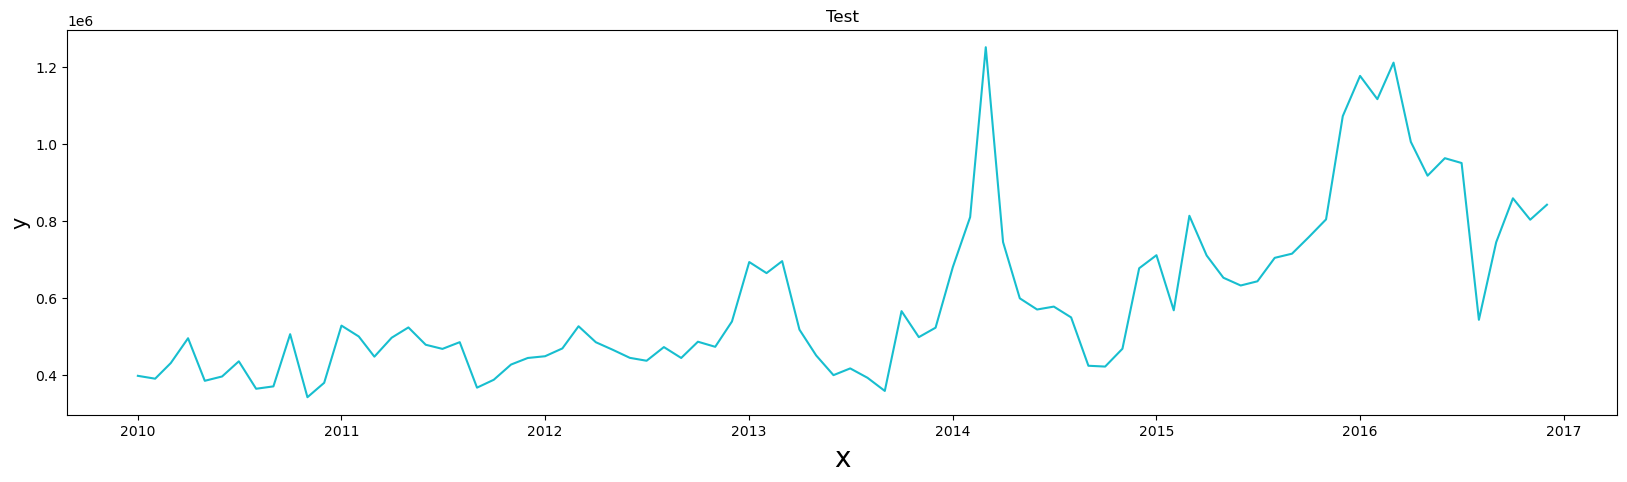

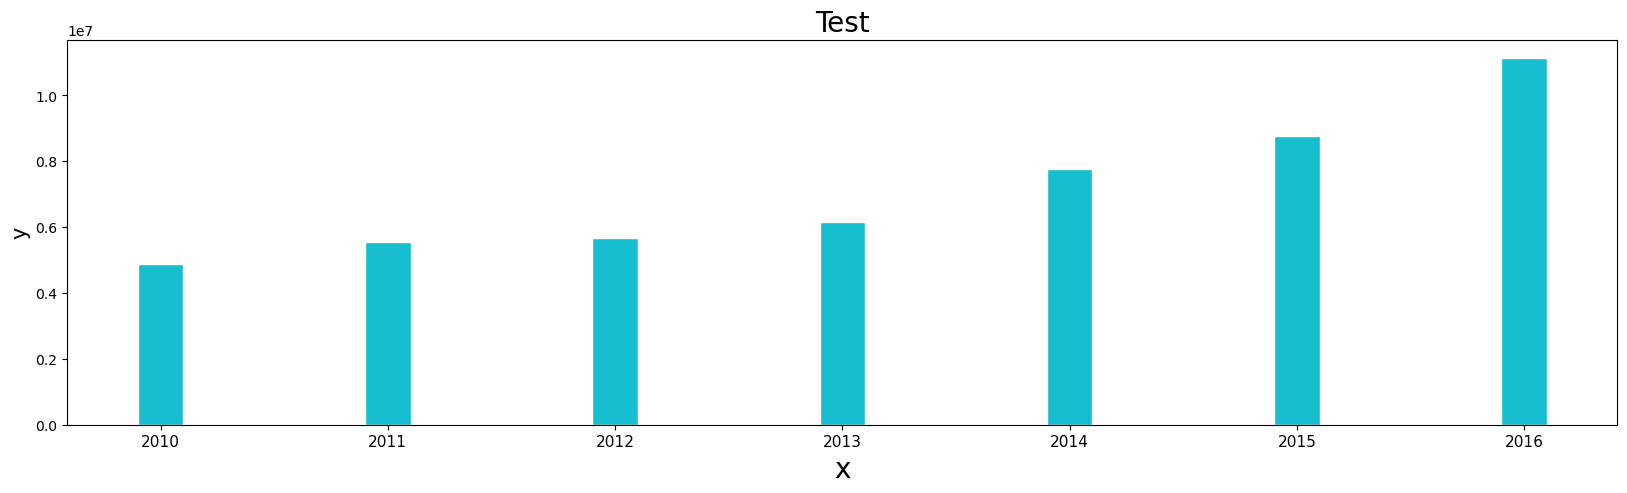

In [22]:
#Function for line plot
def line_plot(data, color, title, x_label, y_label, figure_size = (20,5)):
    plt.figure(figsize = figure_size)
    plt.plot(data, color = 'tab:cyan')
    plt.title(title)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=15)


line_plot(dates_1, "red", "Test", "x", "y")


#Function for bar graph
def bar_graph(tickvalues, figure_size, rotation, data_x, data_y, width, color, x_label, y_label, font_sizex, font_sizey, title):
    tickvalues = tickvalues
    plt.figure(figsize = figure_size)
    plt.xticks(ticks = tickvalues , rotation = rotation, fontsize = 11)
    plt.bar(data_x, data_y, width = width, color = 'tab:cyan', edgecolor = 'white')
    plt.xlabel(x_label, fontsize=font_sizex)
    plt.ylabel(y_label,fontsize=font_sizey)
    plt.title(title, fontsize =font_sizex)
    
# ** The colors being hard assigned to cyan is not a mistake. I changed them later on and didnt want to go through and change all plots.
    
    
bar_graph(tickvalues, (20,5), 'horizontal', words_to_keep, sum_by_year, .2, 'red', "x", "y" , 20 , 15,  'Test')

In [23]:
# creating seperate lists to contain my different regions ## cahnge to series 
Northeast_region = np.asarray([ "Maine", "Massachusetts", "Rhode Island", "Connecticut", "New Hampshire", "Vermont", "New York", "Pennsylvania", "New Jersey", "Delaware", "Maryland"])
Southeast_region = np.asarray(["West Virginia", "Virginia", "Kentucky", "Tennessee", "North Carolina", "South Carolina", "Georgia", "Alabama", "Mississippi", "Arkansas", "Louisiana", "Florida"])
Midwest_region = np.asarray(["Ohio", "Indiana", "Michigan", "Illinois", "Missouri", "Wisconsin", "Minnesota", "Iowa", "Kansas", "Nebraska", "South Dakota", "North Dakota"])
Southwest_region = np.asarray(["Texas", "Oklahoma", "New Mexico", "Arizona"])
West_region = np.asarray(["Colorado", "Wyoming", "Montana", "Idaho", "Washington", "Oregon", "Utah", "Nevada", "California", "Alaska", "Hawaii"])

#sort the input in the region lists
sorter_input = [Northeast_region, Southeast_region, Midwest_region, Southwest_region, West_region]
for i in sorter_input:
    i.sort()

# Using a function to concat the states in each region with the "|" symbol for searching the dataframe
def pattern(region):
    Pattern = '|'.join(region)
    return Pattern



In [24]:
# cleaning and molding northeast data
Northeast_1 = df_gun_clean.loc[df_gun_clean['state'].str.contains(pattern(Northeast_region))]
Northeast_1.head(100)
Northeast_2 = Northeast_1.groupby('date')['permit'].sum()
Northeast_3 = Northeast_1.groupby('state')['permit'].sum()
print(Northeast_2)
Northeast_3

date
2010-01-01    15997
2010-02-01    15259
2010-03-01    20519
2010-04-01    17520
2010-05-01    15313
              ...  
2016-08-01    61936
2016-09-01    54087
2016-10-01    57589
2016-11-01    57099
2016-12-01    52977
Name: permit, Length: 84, dtype: int32


state
Connecticut       877809
Delaware           17504
Maine              10766
Maryland           81893
Massachusetts     639465
New Hampshire     251876
New Jersey             0
New York          292728
Pennsylvania     1215443
Rhode Island           0
Vermont                0
Name: permit, dtype: int32

In [25]:
#created a region cleaner to easily handle the cleaning and storing of data for each region
def region_cleaner(Pattern, line_or_bar):
    Region_1 = df_gun_clean.loc[df_gun_clean['state'].str.contains(Pattern)]
    Region_1.head(100)
    Region_2 = Region_1.groupby('date')['permit'].sum()
    Region_3 = Region_1.groupby('state')['permit'].sum()
    if line_or_bar == 1:
        return Region_3
    elif line_or_bar == 2:
        return Region_2
    else:
        print(Region_2)
        print("\n")
        print(Region_3)
        return


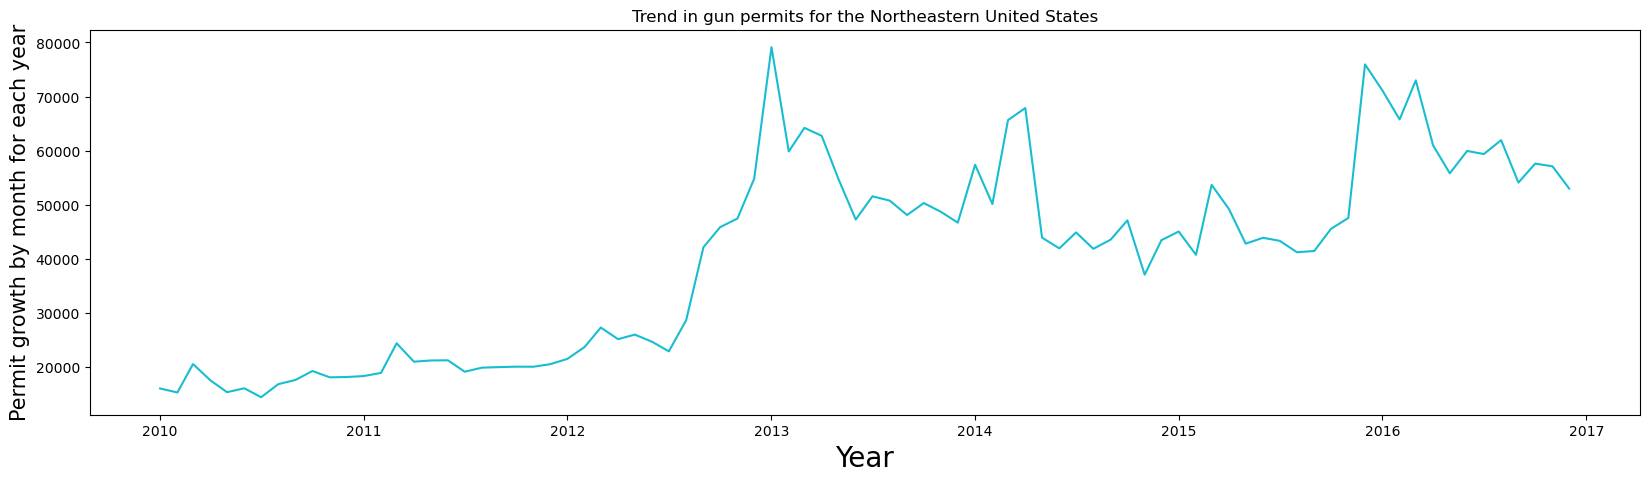

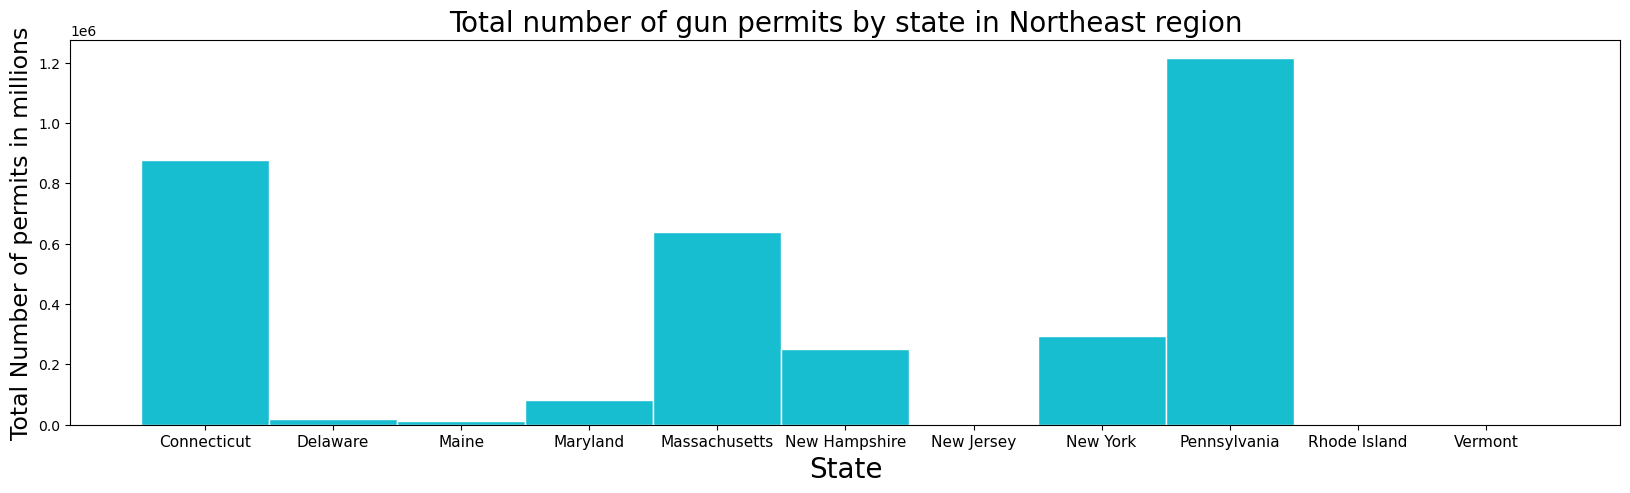

In [26]:
#plotting line plot for Northeast region
line_plot(Northeast_2, 'red', 'Trend in gun permits for the Northeastern United States', 'Year', 'Permit growth by month for each year')
#plotting bar graph for Northeast region
bar_graph(range(0,len(Northeast_region)), (20,5), 'horizontal', Northeast_region, Northeast_3, 1, 'red', 'State', 'Total Number of permits in millions', 20, 17 , 'Total number of gun permits by state in Northeast region')

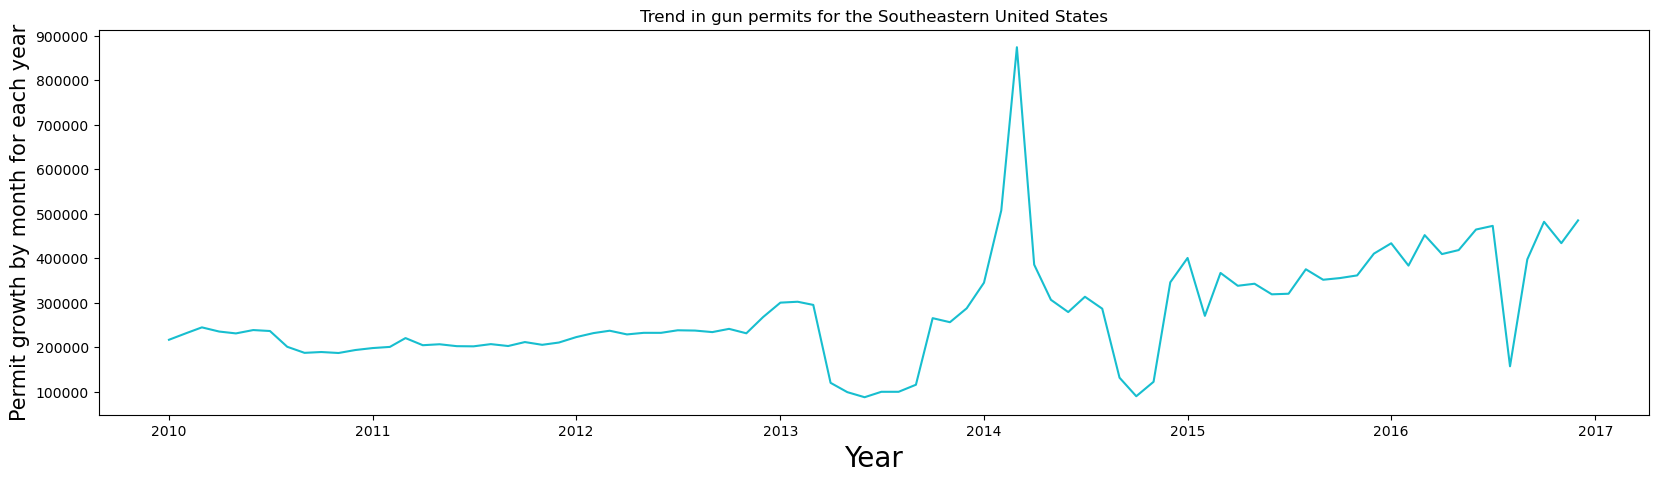

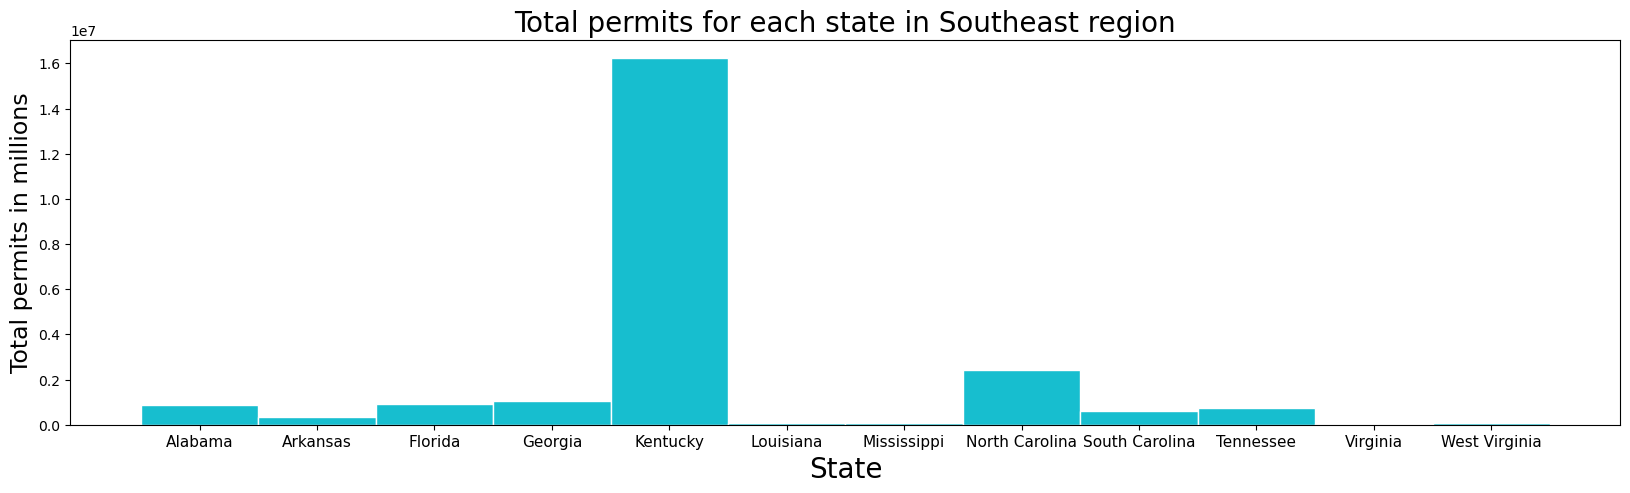

In [27]:
line_plot(region_cleaner(pattern(Southeast_region), 2), "red", 'Trend in gun permits for the Southeastern United States', 'Year', 'Permit growth by month for each year')


bar_graph(range(0, len(Southeast_region)), (20,5), 'horizontal', Southeast_region, region_cleaner(pattern(Southeast_region), 1), 1, 'red', 'State', 'Total permits in millions', 20, 17, 'Total permits for each state in Southeast region')

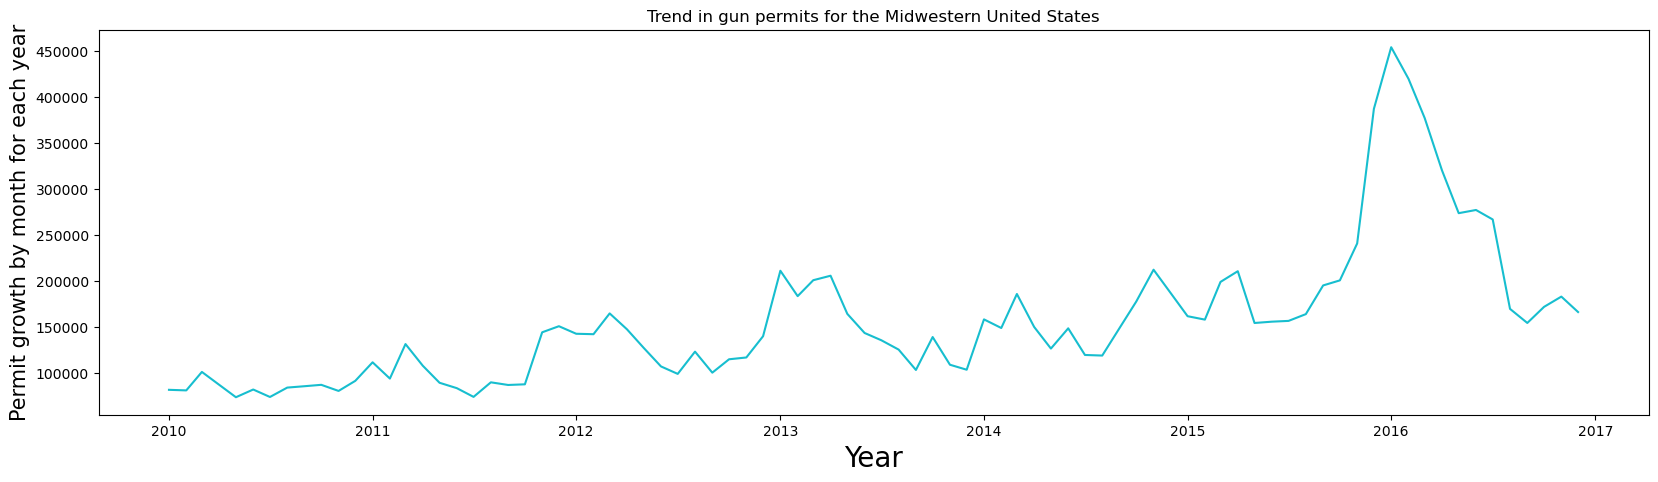

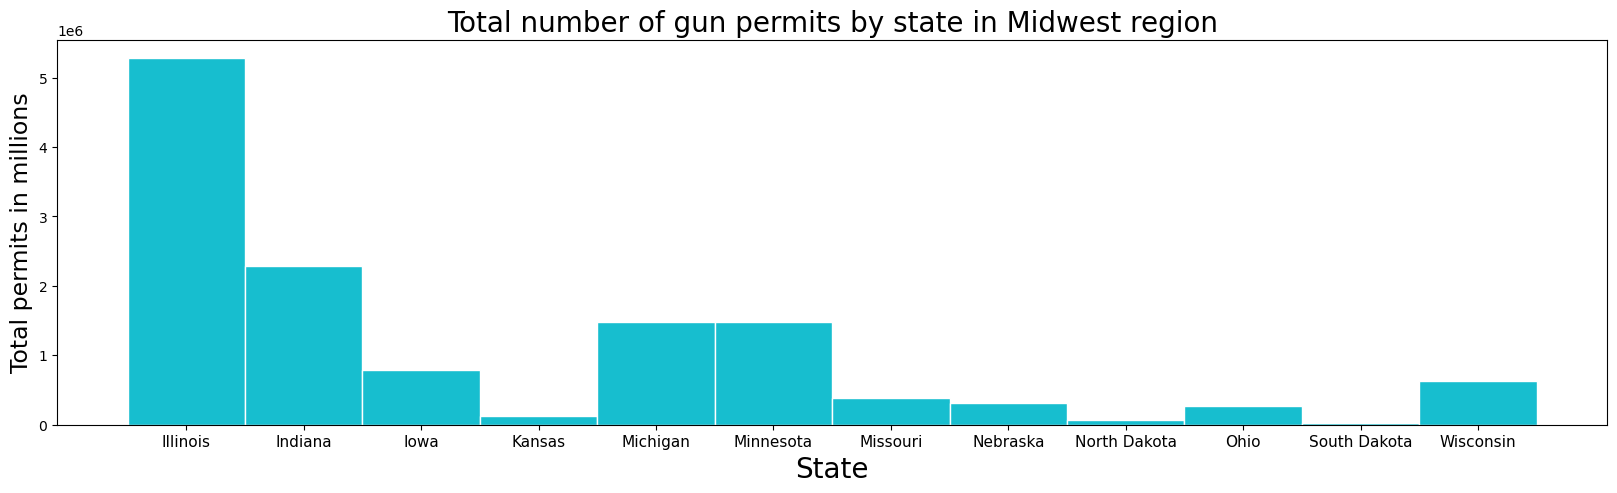

In [28]:
line_plot(region_cleaner(pattern(Midwest_region), 2), "red", 'Trend in gun permits for the Midwestern United States', 'Year', 'Permit growth by month for each year')


bar_graph(range(0, len(Midwest_region)), (20,5), 'horizontal', Midwest_region, region_cleaner(pattern(Midwest_region), 1), 1, 'red', 'State', 'Total permits in millions', 20, 17 , 'Total number of gun permits by state in Midwest region')

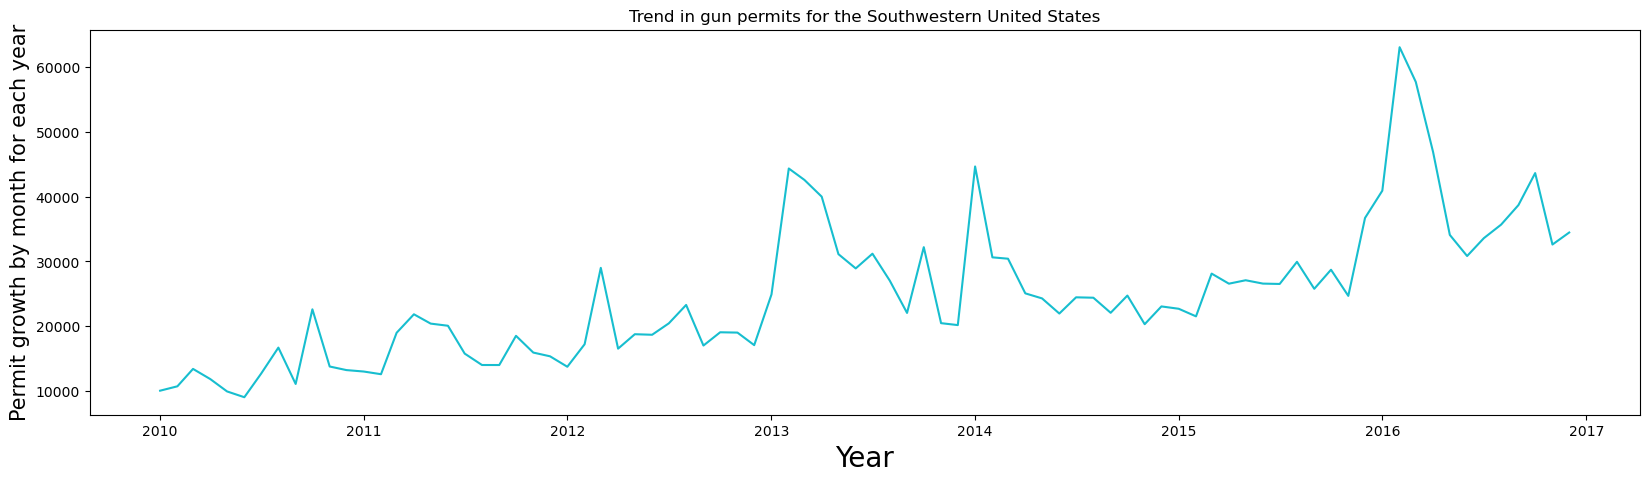

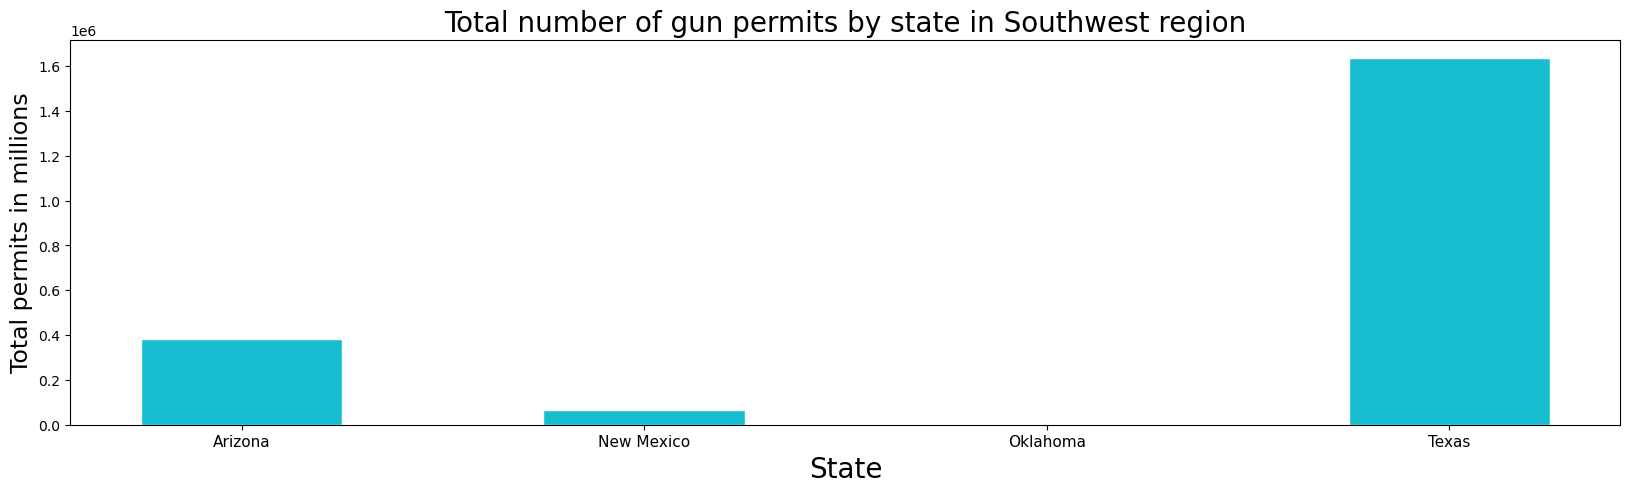

In [29]:
line_plot(region_cleaner(pattern(Southwest_region), 2), "red", 'Trend in gun permits for the Southwestern United States', 'Year', 'Permit growth by month for each year')


bar_graph(range(0, len(Southwest_region)), (20,5), 'horizontal', Southwest_region, region_cleaner(pattern(Southwest_region), 1), .5, 'red', 'State', 'Total permits in millions', 20, 17 , 'Total number of gun permits by state in Southwest region')

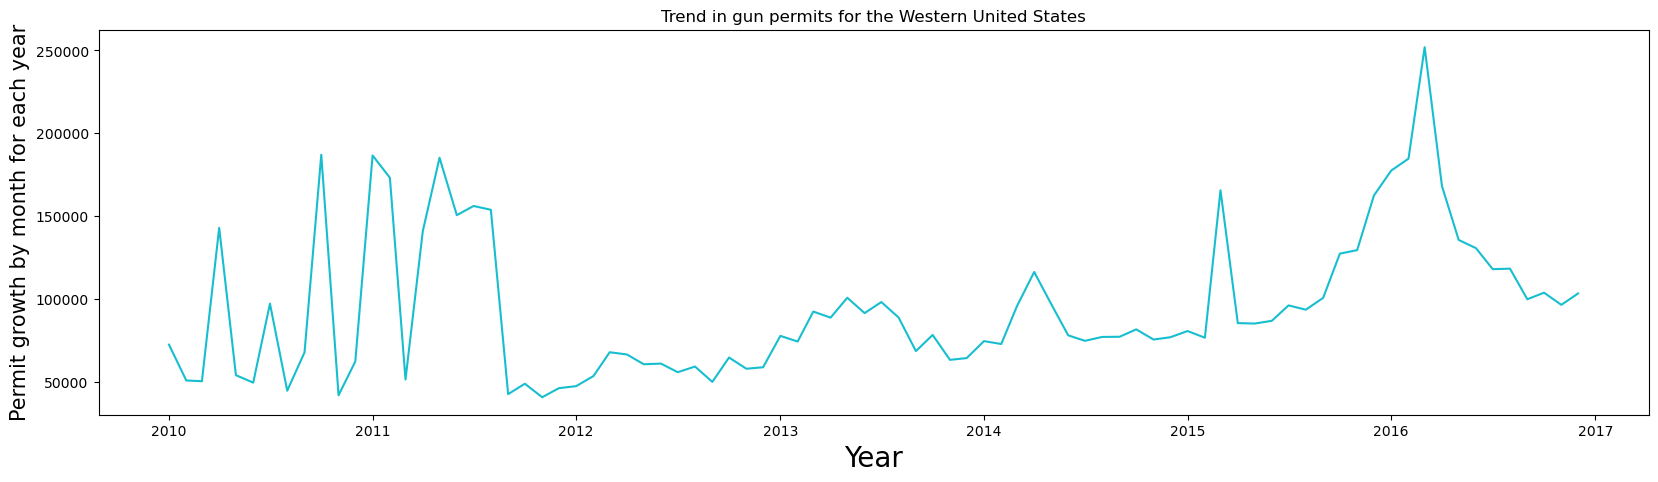

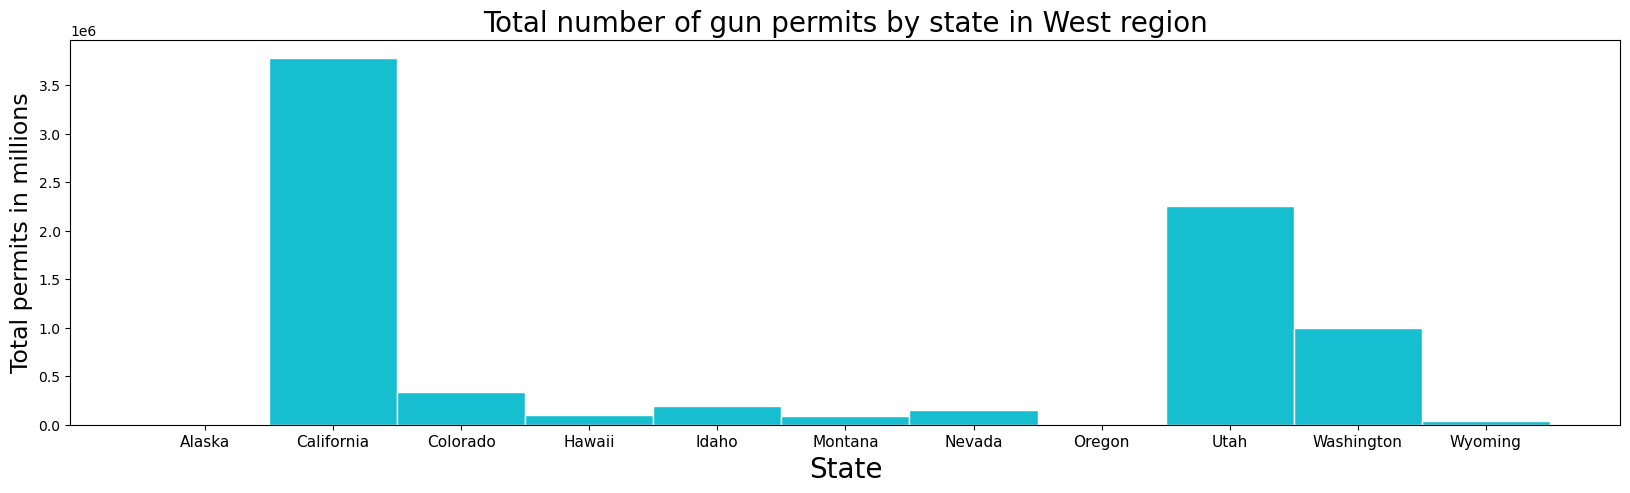

In [30]:
line_plot(region_cleaner(pattern(West_region), 2), "red", 'Trend in gun permits for the Western United States', 'Year', 'Permit growth by month for each year')


bar_graph(range(0, len(West_region)), (20,5), 'horizontal', West_region, region_cleaner(pattern(West_region), 1), 1, 'red', 'State', 'Total permits in millions', 20, 17 , 'Total number of gun permits by state in West region')

# Additional thoughts:
- In almost every case, when you break down the regions into individual state contributions like in the bar graphs pictured above, it shows that one or two states will account for the vast majority of permits in a given region. 
- It may be prosperous in the future to remove the outliers and maybe add in some sort of place holder to get a better understanding of the overall trends. IE. California alone could be responsible for the massive spike in permit holdings in 2016. Although most regions show this trend, it wouldnt be outlandish to think that maybe the majority players are applying too much influence to these initial results.

# **Question 1 discussion**:
- My findings indicate an overall positive trend in gun permit holdings across the country and across each individual region during the specified time period. According to the figures observes in my study, the overall number of gun permit holdings in the United States increased by over 110% from 2010 to 2016, showing a very stable demand in new gun permits per month and per year. 

- While regional variations exist, the data suggests a steady increase in the number of gun permit applications and issuances during this time period. These findings contribute to the understanding that evolving dynamics in firearm ownership highlight the importance of considering key regional factors in studying gun permit trends througout the entire country.

### Question 2: Out of the regions tested in question 1, rank the regions by the median household income, percentage of persons with a bachelors degree or higher, and percentage of persons in poverty.

In [31]:
# creating new seperate lists to contain my different regions and the fact column for the census data ## cahnge to series 
Northeast_region = np.asarray([ "Fact", "Maine", "Massachusetts", "Rhode Island", "Connecticut", "New Hampshire", "Vermont", "New York", "Pennsylvania", "New Jersey", "Delaware", "Maryland"])
Southeast_region = np.asarray(["Fact", "West Virginia", "Virginia", "Kentucky", "Tennessee", "North Carolina", "South Carolina", "Georgia", "Alabama", "Mississippi", "Arkansas", "Louisiana", "Florida"])
Midwest_region = np.asarray(["Fact","Ohio", "Indiana", "Michigan", "Illinois", "Missouri", "Wisconsin", "Minnesota", "Iowa", "Kansas", "Nebraska", "South Dakota", "North Dakota"])
Southwest_region = np.asarray(["Fact","Texas", "Oklahoma", "New Mexico", "Arizona"])
West_region = np.asarray(["Fact","Colorado", "Wyoming", "Montana", "Idaho", "Washington", "Oregon", "Utah", "Nevada", "California", "Alaska", "Hawaii"])


In [32]:
#variable to hold the row name we are querying
median = 'Median household income (in 2015 dollars), 2011-2015'
#creating a subset of the clean census date with only the northeast region and then verifying this data
Northeast_MHI = df_census_clean[Northeast_region]
#querying the subset data to only get the data from the row in the Fact column that matches our median variable
Northeast_MHI2 = Northeast_MHI.query('Fact == @median')
#dropping the fact row and then casting every column value to an integer
Northeast_MHI2 = Northeast_MHI2.iloc[:, 1:].astype(int)
#finding the mean of MHI for the northeast region
Northeast_MHI2.sum().mean()

62459.36363636364

In [33]:
#creating a function to reuse when evaluating the rest of the regions
def Mean_calc(search_string, region):
    string = search_string
    state_selector = df_census_clean[region]
    Fact_selector = state_selector.query('Fact == @string')
    Final_df = Fact_selector.iloc[:, 1:].astype(int)
    return Final_df.sum().mean().astype(int)
    

In [34]:
#creating a dictionary of region names and their MHI mean to iterate through and rank
MHI_means = {"Southeast_region":Mean_calc('Median household income (in 2015 dollars), 2011-2015', Southeast_region),
"Midwest_region": Mean_calc('Median household income (in 2015 dollars), 2011-2015', Midwest_region),
"Southwest_region": Mean_calc('Median household income (in 2015 dollars), 2011-2015', Southwest_region),
"Northeast_region": Mean_calc('Median household income (in 2015 dollars), 2011-2015', Northeast_region), 
"West_region":Mean_calc('Median household income (in 2015 dollars), 2011-2015', West_region)}
#creating a sorted dictionary to use for the final graph
MHI_means_keys_sorted = {}
for key, value in sorted(MHI_means.items(),key=lambda x:x[1], reverse = True ):
    MHI_means_keys_sorted.update({key:value})
#iterating through and ranking regions from MHI_means
print('Median household income by region in the United States:\n')
for key, value in enumerate(sorted(MHI_means.items(),key=lambda x:x[1], reverse = True ),1):
    print(f"{key}. {value[0]}: {value[1]}")

Median household income by region in the United States:

1. Northeast_region: 62459
2. West_region: 58449
3. Midwest_region: 52948
4. Southwest_region: 48826
5. Southeast_region: 46242


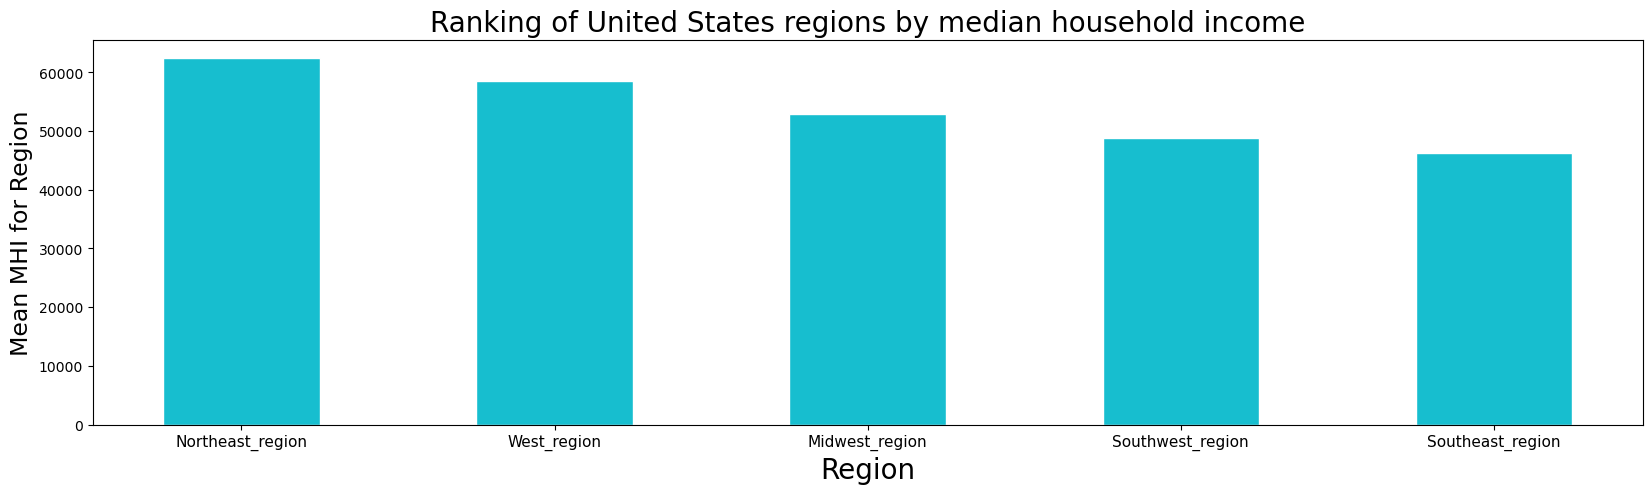

In [35]:
#creating bar graph using custom function to show the average MHI by region
bar_graph(range(0, len(MHI_means.keys())),(20,5),'horizontal',MHI_means_keys_sorted.keys(), MHI_means_keys_sorted.values(),  .5, 'red', 'Region', 'Mean MHI for Region', 20, 17, 'Ranking of United States regions by median household income')

# Inital thoughts:
- In my opinion, median household income is one of the strongest if not the strongest of the socio-economic indicatora that I am testing. 
- The results of this testing lead me to belive that the northeast region will lead in most categories that have to do with education, money, gdp, assets etc. 

In [36]:
#Editing Mean_calc so that it will clean the % symbols from my final dataframe
def Mean_calc(search_string, region):
    string = search_string
    state_selector = df_census_clean[region]
    Fact_selector = state_selector.query('Fact == @string')
    almost_final_df = Fact_selector[Fact_selector.columns[1:]].apply(lambda x: x.str.replace('%', ''))
    Final_df = almost_final_df.iloc[:, :].astype(float)
    Final_df1 = Final_df[Final_df.columns[:]].apply(lambda x: x if x.item() > 1 else x*100)
    Final = Final_df1.sum().mean().astype(float)
    return round(Final,2)

In [37]:
BD_means = {"Southeast_region":Mean_calc("Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", Southeast_region),
"Midwest_region": Mean_calc("Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", Midwest_region),
"Southwest_region": Mean_calc("Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", Southwest_region),
"Northeast_region": Mean_calc("Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", Northeast_region), 
"West_region":Mean_calc("Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", West_region)}
#creating a sorted dictionary to use for the final graph
BD_means_keys_sorted = {}
for key, value in sorted(BD_means.items(),key=lambda x:x[1], reverse = True ):
    BD_means_keys_sorted.update({key:value})
#iterating through and ranking regions from MHI_means
print("Regions Ranked by Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015\n")
for key, value in enumerate(sorted(BD_means.items(),key=lambda x:x[1], reverse = True ),1):
    print(f"{key}. {value[0]}: {value[1]}%")

Regions Ranked by Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015

1. Northeast_region: 34.31%
2. West_region: 29.75%
3. Midwest_region: 28.31%
4. Southwest_region: 26.38%
5. Southeast_region: 25.07%


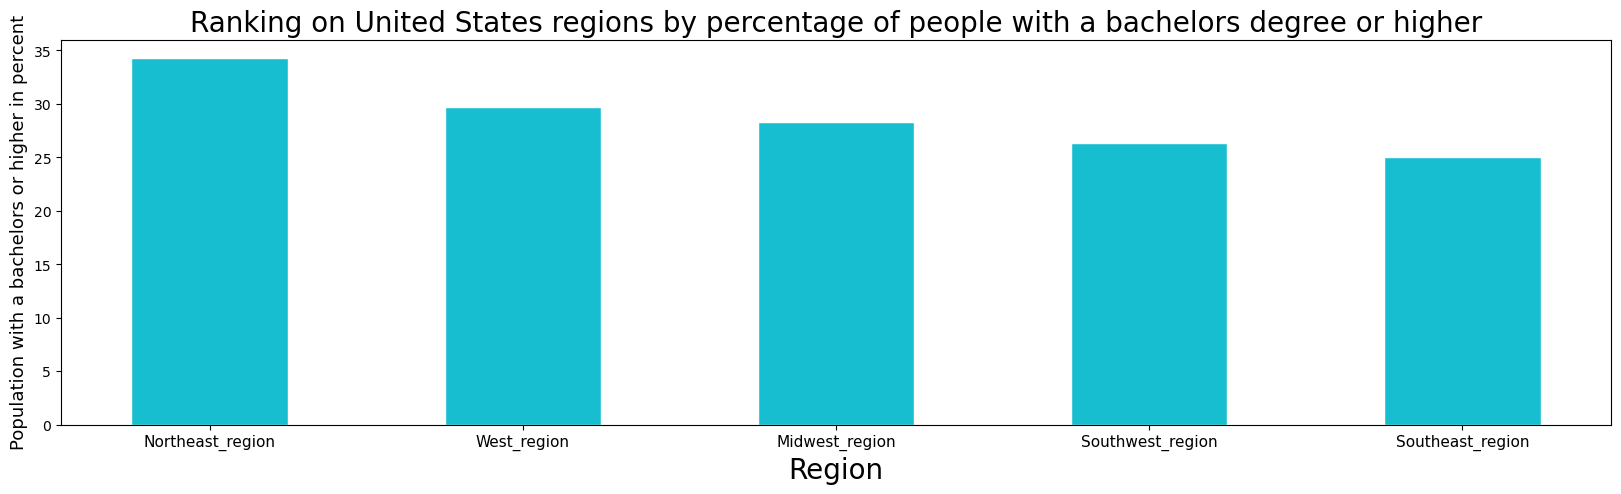

In [38]:
#creating bar graph using custom function to show the average MHI by region
bar_graph(range(0, len(BD_means.keys())),(20,5),'horizontal',BD_means_keys_sorted.keys(), BD_means_keys_sorted.values(),  .5, 'red', 'Region', 'Population with a bachelors or higher in percent', 20 ,13, 'Ranking on United States regions by percentage of people with a bachelors degree or higher')

In [39]:
PIP_means = {"Southeast_region":Mean_calc("Persons in poverty, percent", Southeast_region),
"Midwest_region": Mean_calc("Persons in poverty, percent", Midwest_region),
"Southwest_region": Mean_calc("Persons in poverty, percent", Southwest_region),
"Northeast_region": Mean_calc("Persons in poverty, percent", Northeast_region), 
"West_region":Mean_calc("Persons in poverty, percent", West_region)}
#creating a sorted dictionary to use for the final graph
PIP_means_keys_sorted = {}
for key, value in sorted(PIP_means.items(),key=lambda x:x[1], reverse = True ):
    PIP_means_keys_sorted.update({key:value})
#iterating through and ranking regions from MHI_means
print("Percentage of persons in poverty\n")
for key, value in enumerate(sorted(PIP_means.items(),key=lambda x:x[1], reverse = True ),1):
    print(f"{key}. {value[0]}: {value[1]}%")

Percentage of persons in poverty

1. Southwest_region: 17.02%
2. Southeast_region: 16.66%
3. Midwest_region: 12.64%
4. West_region: 12.01%
5. Northeast_region: 11.28%


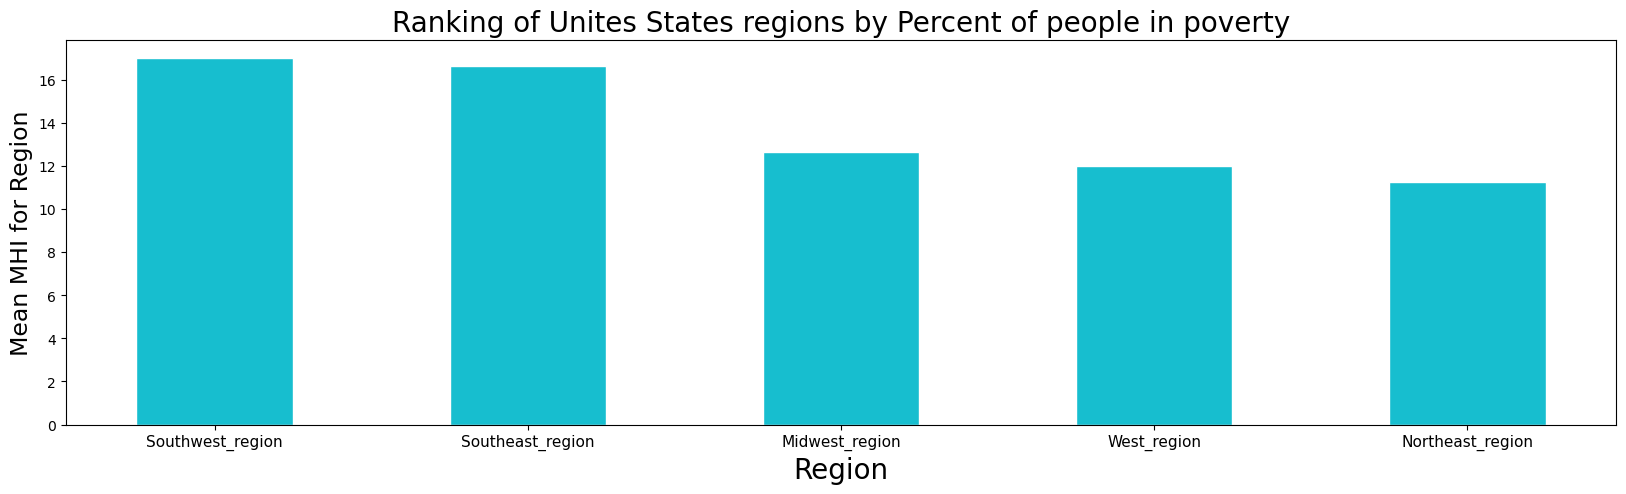

In [40]:
#creating bar graph using custom function to show the average MHI by region
bar_graph(range(0, len(BD_means.keys())),(20,5),'horizontal',PIP_means_keys_sorted.keys(), PIP_means_keys_sorted.values(),  .5, 'red', 'Region', 'Mean MHI for Region', 20 , 17, 'Ranking of Unites States regions by Percent of people in poverty')

# __Question 2 discussion__: 

- This question ranking US regions based on median household income, population with a bachelor's degree or higher, and the percent of people in poverty revealed intriguing insights. The rankings for median household income placed the northeast region at the top, followed closely by the west and midwest regions. The southwest and southeast regions ranked lowest in this category. This same ranking order can also be observed for the results when looking at percentage of people with a bachelors degree or higheer. Interestingly, the rankings for the percent of people in poverty showcased an inverse result with the southwest and southeast regions demonstrating by far the highest percentages, highlighting higher poverty rates in these areas compared to the other regions. 

- There are some very compelling points to be made about the inverse relationship between poverty and income/intelligence, if I were to explore this dataset further I would make sure to pay close attention to see how that data changes. 

# Section 4: Conclusion

#### Question(s) for Analysis
1. Is there an overall positive or negative trend of gun permit holdings from 2010 - 2016 for the entire country, and each region?

2. Out of the regions tested in question 1, rank the regions by the median household income, percentage of persons with a bachelors degree or higher, and percentage of persons in poverty.


### Explaining data results

- In this case study, I aimed to investigate the trend of gun permit purchases from 2010 to 2016 in the United States and each of its distinct regions. I then explored three high impact socioeconomic factors in order to rank the regions based on each of these factors. 

- My findings indicate an overall positive trend in gun permit holdings across the country and across each individual region during the specified time period. According to the figures observed in my study, the overall number of gun permit holdings in the United States increased by over 110% from 2010 to 2016, showing a very stable demand in new gun permits per month and per year. 

- While regional variations exist, the data suggests a steady increase in the number of gun permit applications and issuances during this time period. These findings contribute to the understanding that evolving dynamics in firearm ownership highlight the importance of considering key regional factors in studying gun permit trends througout the entire country.

- It is essential to understand that regional variations can play a major role in analyzing gun permit trends. Different states and regions may have distinct gun legislature, socio-economic conditions, and biases towards guns. These factors can influence the rate of gun permit purchases and contribute to the variation observed across the country. Further research and analysis is needed to explore the underlying causes and consequences of these disparities.

### Reviewing limiting factors
- While the analysis of gun permit purchases from 2010 to 2016 provides valuable insights into the trends and regional variations, it is important to acknowledge the limitations and constraints that exist in drawing broader conclusions from these findings.

     1. Limited Time Frame: The study focused on a specific time period, from 2010 to 2016, which may not capture the most recent developments and changes in gun permit holdings. One must recognize that the landscape of gun ownership and regulations may have evolved since then, and new factors could be influencing the trends observed in more recent years. Therefore, caution should be exercised when generalizing the findings beyond the specified time frame.

     2. Data Availability and Accuracy: The accuracy and availability of data on gun permit purchases can vary across states and regions. Different states may have different reporting systems, and the quality and consistency of data collection may vary. Moreover, the accuracy of the data depends on the compliance and reporting practices of permit issuers, which might introduce biases and inaccuracies in the analysis. It is important to consider these limitations when attempting to make broader conclusions based on the data at hand.
     
     3. Data complexity: My analysis focused on the number of gun permit holdings without exploring the underlying reasons for the observed trends. The drivers of gun ownership are multifaceted, encompassing nuanced cultural, social, economic, and political factors. It would be more effective to identify the underlying causes and explore more granular avenues that may connect to influence these trends.

### In closing

- It is important to note that the positive trend observed in gun permit purchases does not imply causation or provide insights into the underlying reasons behind the trend. Similarly to what I mentioned above, the rise in gun permit purchases could be influenced by various factors, such as changes in gun laws, public perception, or regional differences in demographics and socio-political climate. Further research and access to more recent and detailed data would be required to gain a comprehensive understanding of the drivers behind these trends as well.

- The positive trend in gun permit holdings from 2010 to 2016 underscores the complex and multifaceted nature of gun ownership in the United States and its regions/states, emphasizing the need for ongoing research and analysis to inform policy discussions and promote a comprehensive understanding of why these trends are moving in this direction.